In [1]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Build an absolute path from this notebook's parent directory
module_path = os.path.abspath(os.path.join('..', 'src'))
print(module_path)
# Add to sys.path if not already present
if module_path not in sys.path:
    sys.path.append(module_path)
print(module_path)
# Now you can import the desired function or class
from graph_helpers import *
from helpers import *
from mod_si import *
from plots import *

/nfs/nfs9/home/nobackup/vakrao/nz_model/src
/nfs/nfs9/home/nobackup/vakrao/nz_model/src


/tmp/ipykernel_554486/652791558.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(months)
/tmp/ipykernel_554486/652791558.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(months)


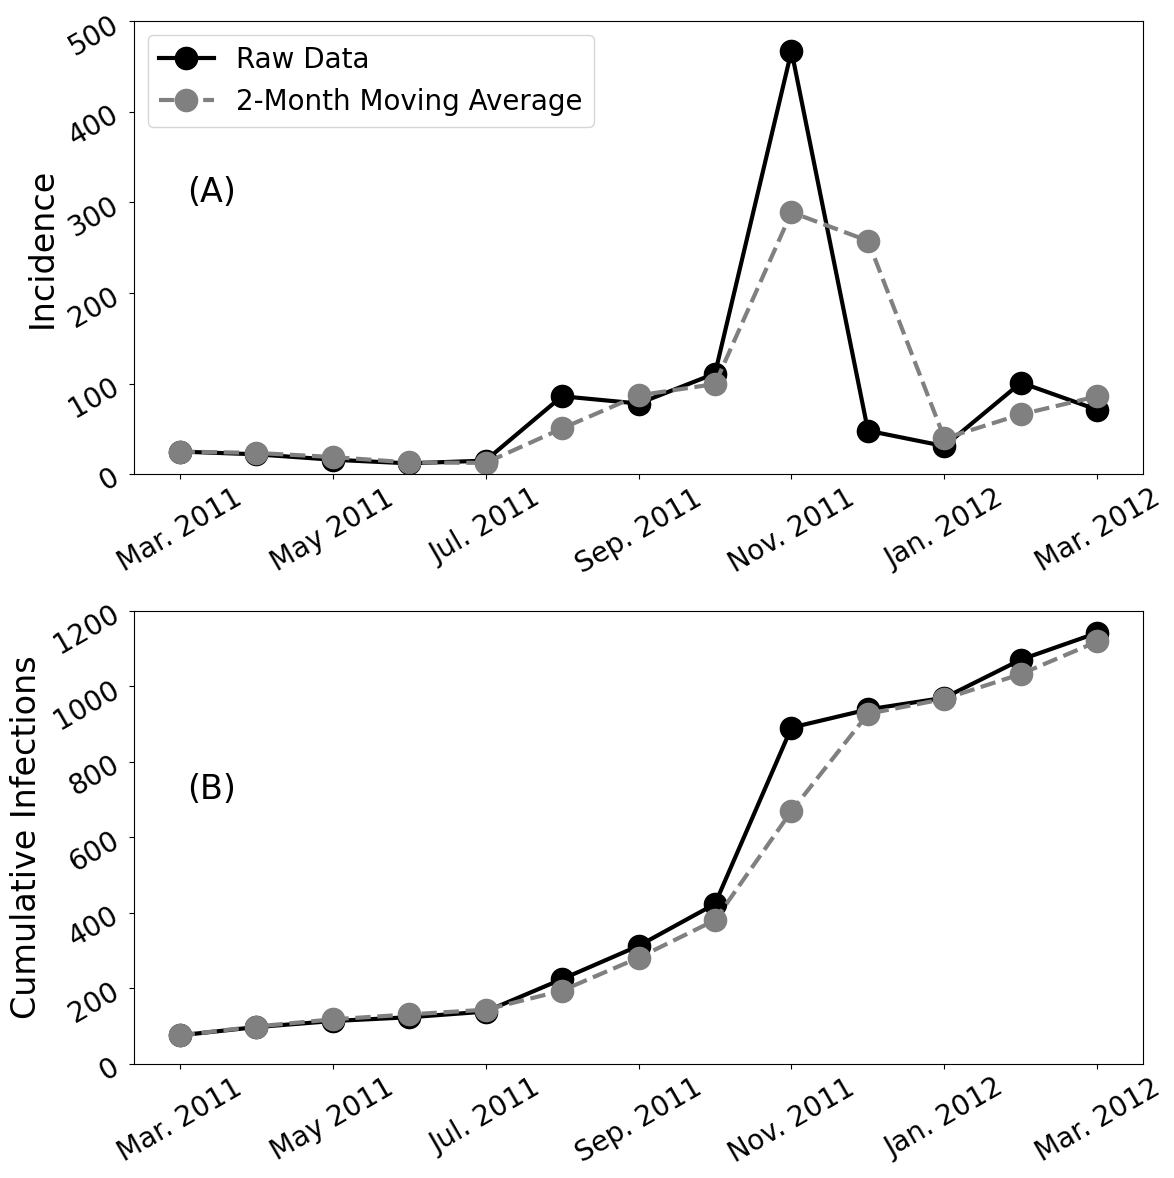

In [3]:
## okay - now let's find the associated line plots! 
# creating a dictionary
top_amount = 10
line_x,line_y,ms,lw = 12,12,16,3
ls = 20
ax_s = ls + 4
font = {'size': 14}
colors = ['#1f78b4','#d95f02']
annot_fs = 24
ma_lab = "2-Month Moving Average"
raw_lab = "Raw Data"
months_all = ["Feb/11","Mar/11","Apr/11","May/11","Jun/11","Jul/11","Aug/11","Sep/11","Oct/11","Nov/11","Dec/11","Jan/12","Feb/12","Mar/12"]
months = ["","Mar. 2011","May 2011","Jul. 2011","Sep. 2011","Nov. 2011","Jan. 2012","Mar. 2012"]
#months_all = ["Feb/11","Mar/11","Apr/11","May/11","Jun/11","Jul/11","Aug/11","Sep/11","Oct/11","Nov/11","Dec/11","Jan/12","Feb/12","Mar/12"]
mark_type = "o"
# using rc function
plt.rc('font', **font)
## need to find worst_concigs now
wind_dat = pd.read_csv("../params/window_psa.csv")
new_dat = pd.read_csv("../params/raw_data.csv")
# now graph wind/new
wind_inc = list(wind_dat["Delta Orchard"])[1:]
wind_cuml = list(wind_dat["Cumulative Orchards"])[1:]
new_inc = list(new_dat["Delta Orchard"])[1:]
new_cuml = list(new_dat["Cumulative Orchards"])[1:]
tick_angle = 30
fig,ax = plt.subplots(2,1,figsize=(line_x,line_y))
## need to find worst_concigs now
# panel A
ax[0].plot(new_inc,label=raw_lab,marker=mark_type,color="k",markersize=ms,linewidth=lw)
ax[0].plot(wind_inc,label=ma_lab,marker=mark_type,color="grey",linestyle="--",markersize=ms,linewidth=lw)
ax[0].set_ylabel("Incidence",size=ax_s)
ax[0].tick_params(axis='x', labelrotation=tick_angle,labelsize=ls)
ax[0].tick_params(axis='y', labelrotation=tick_angle,labelsize=ls)
ax[0].set_xticklabels(months)
ax[0].set_ylim([0,500])
ax[0].annotate("(A)",(0.1,300),size=annot_fs)
ax[0].legend(fontsize=ls)
# panel B
ax[1].plot(new_cuml,label="Real",marker=mark_type,color="k",markersize=ms,linewidth=lw)
ax[1].plot(wind_cuml,label="MA(2)",marker=mark_type,linestyle="--",color="grey",markersize=ms,linewidth=lw)
ax[1].set_ylabel("Cumulative Infections",size=ax_s)
ax[1].tick_params(axis='x', labelrotation=tick_angle,labelsize=ls)
ax[1].tick_params(axis='y', labelrotation=tick_angle,labelsize=ls)
ax[1].set_xticklabels(months)
ax[1].set_ylim([0,1200])

ax[1].annotate("(B)",(0.1,700),size=annot_fs)
fig.tight_layout()
#ax[1].set_xlabel("Time",size=ax_s)
fig.savefig("figs/inc_comp.png")